In [73]:
import csv
import time as t
import numpy as np

from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic, EarthLocation, AltAz)
import astropy.coordinates as coord

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from matplotlib import animation
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.dpi'] = 360
rc("animation", html = "jshtml")

In [34]:
rosettes = [3,6,7,11,12,13,14,15,18,19]

In [35]:
def graph_mod(r):

    nodes = []
    edges = []
    mass = []

    with open(f'../data/rosette{r}_nodes.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                n = []
                n.append(float(values[0]))
                n.extend(22.5-2.5*np.log10([float(n) for n in values[2:-1]]))
                n.append(float(values[-1]))
                nodes.append(n)
                mass.append(float(values[1]))

    with open(f'../data/rosette{r}_edges.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                edges.append([float(n) for n in list(row.values())])

    return (nodes,edges,mass)

In [36]:
def coordinates(r):
    coord = []
    with open(f'../coord/rosette{r}.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                coord.append([float(n) for n in values])

    return coord

In [37]:
def graph_r(r):

    nodes = []
    edges = []
    mass = []

    with open(f'../data/rosette{r}_nodes.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                n = []
                n.append(float(values[0]))
                n.extend(22.5-2.5*np.log10([float(n) for n in values[2:-1]]))
                n.append(float(values[-1]))
                nodes.append(n)
                mass.append(float(values[1]))

    with open(f'../data/rosette{r}_edges.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                edges.append([float(n) for n in list(row.values())])

    return (nodes,edges,mass)

In [38]:
def plot_graph(r):

    coord = np.array(coordinates(r))
    nodes, edges, mass = graph_r(r)
    nodes, edges = np.array(nodes), np.array(edges)

    plt.rcParams['font.size'] = 9
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    cmap = cm.viridis
    c_values = np.array(mass)
    norm = (c_values - np.min(c_values)) / (np.max(c_values) - np.min(c_values))
    min_norm = np.min(c_values)
    max_norm = np.max(c_values)
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
    sm.set_array([])

    ax.scatter(coord[:, 1], coord[:, 2], coord[:, 3], c=cmap(norm), s=norm)

    for edge in edges:
        indices = np.where(coord[:, 0] == edge[0])[0]
        x1, y1, z1 = coord[indices[0], 1:4]

        indices = np.where(coord[:, 0] == edge[1])[0]
        x2, y2, z2 = coord[indices[0], 1:4]

        ax.plot([x1, x2], [y1, y2], [z1, z2], color='black', linewidth=0.1)

    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('DEC (deg)')
    ax.set_zlabel('d (Mpc)')
    plt.title(f'Rosette {r}\nr < 10 Mpc')

    ax.xaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.yaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.zaxis._axinfo["grid"]['linewidth'] = 0.5

    cbar = plt.colorbar(sm, ax=ax, pad=0.14)
    cbar.set_label(r'$\log M_{*}$')

    plt.tight_layout()
    #plt.savefig(f'./rosette_img/rosette{r}.png')
    #plt.show()

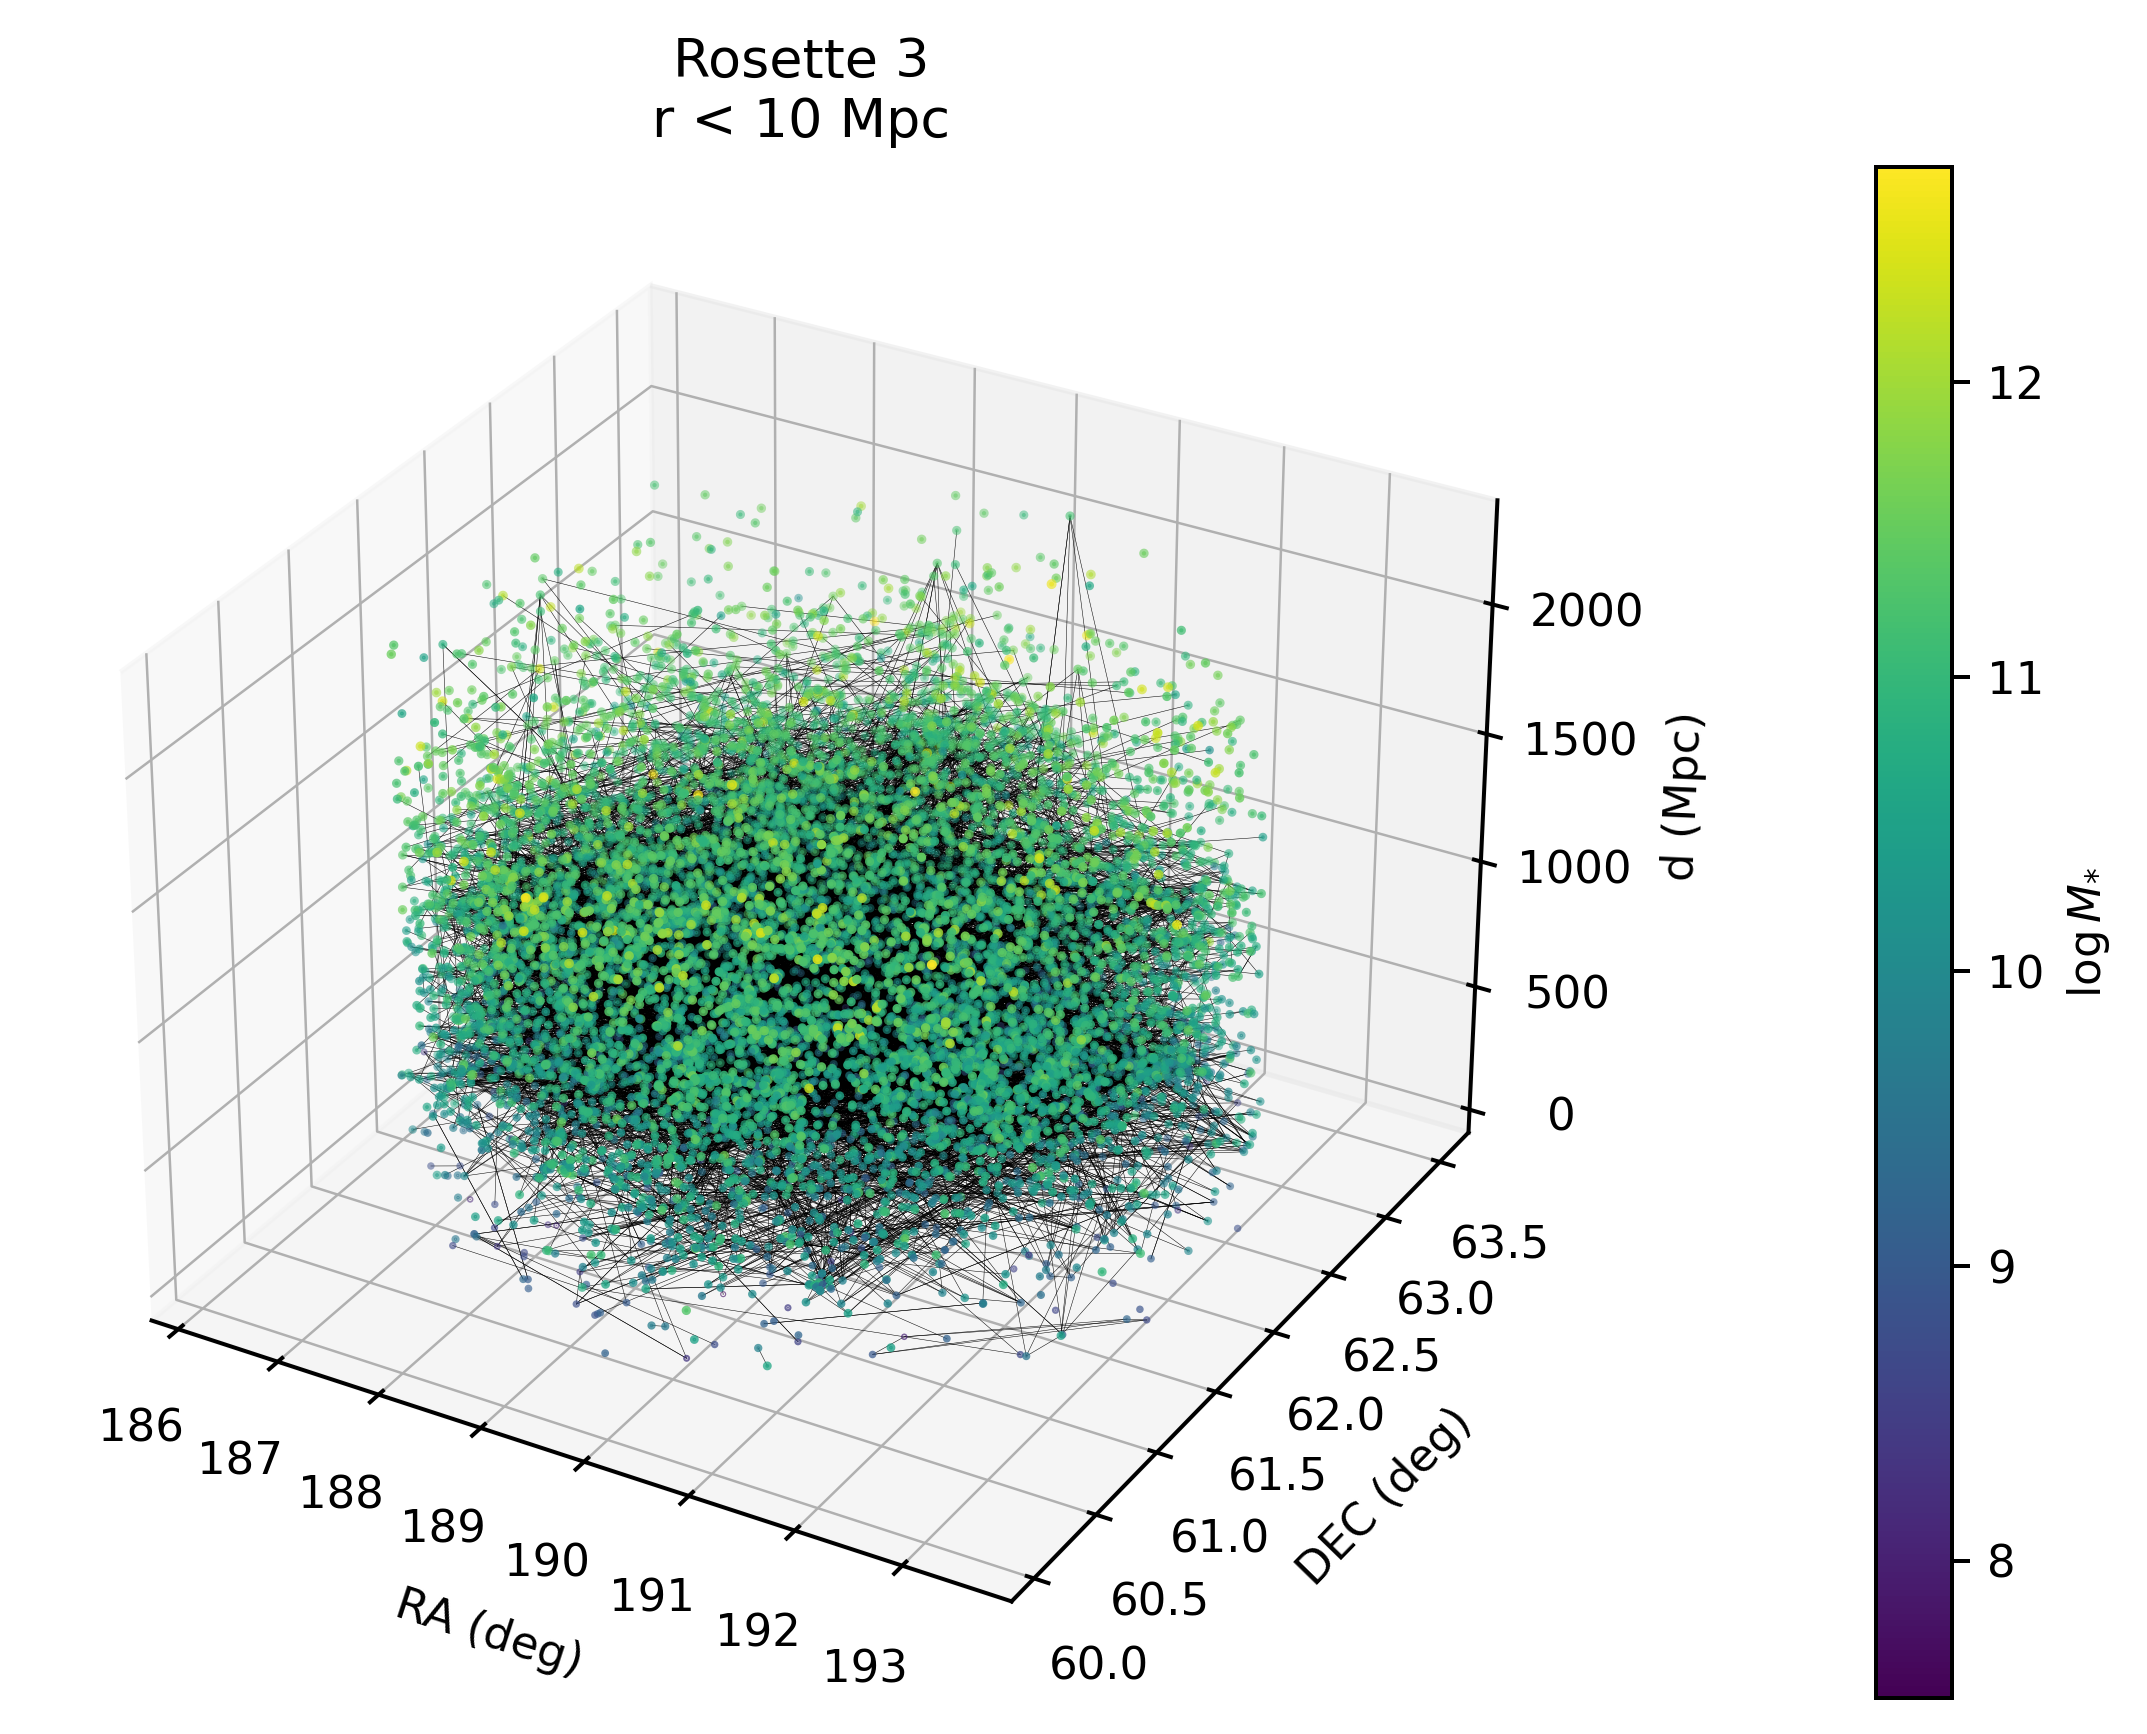

In [39]:
plot_graph(rosettes[0])

In [57]:
def coord_mod(r):
    coord = []
    with open(f'../coord/rosette{r}.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = [float(n) for n in list(row.values())]
                c = []
                c.append(values[0])
                c.append(float(values[3])*np.cos(values[2])*np.cos(values[1]))
                c.append(float(values[3])*np.cos(values[2])*np.sin(values[1]))
                c.append(float(values[3])*np.sin(values[2]))

                coord.append(c)

    return coord

In [64]:
def plot_graph(r):

    coord = np.array(coord_mod(r))
    nodes, edges, mass = graph_mod(r)
    nodes, edges = np.array(nodes), np.array(edges)

    plt.rcParams['font.size'] = 9
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    cmap = cm.viridis
    c_values = np.array(mass)
    norm = (c_values - np.min(c_values)) / (np.max(c_values) - np.min(c_values))
    min_norm = np.min(c_values)
    max_norm = np.max(c_values)
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
    sm.set_array([])

    ax.scatter(coord[:, 1], coord[:, 2], coord[:, 3], c=cmap(norm), s=mass)

    for edge in edges:
        indices = np.where(coord[:, 0] == edge[0])[0]
        x1, y1, z1 = coord[indices[0], 1:4]

        indices = np.where(coord[:, 0] == edge[1])[0]
        x2, y2, z2 = coord[indices[0], 1:4]

        ax.plot([x1, x2], [y1, y2], [z1, z2], color='black', linewidth=0.1)

    ax.set_xlabel('X (Mpc)')
    ax.set_ylabel('Y (Mpc)')
    ax.set_zlabel('Z (Mpc)')
    plt.title(f'Rosette {r}\nr < 10 Mpc')

    ax.xaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.yaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.zaxis._axinfo["grid"]['linewidth'] = 0.5

    cbar = plt.colorbar(sm, ax=ax, pad=0.14)
    cbar.set_label(r'$\log M_{*}$')

    plt.tight_layout()
    #plt.savefig(f'./rosette_img/rosette{r}.png')
    #plt.show()

time plotting rosette_3: 11.67 s


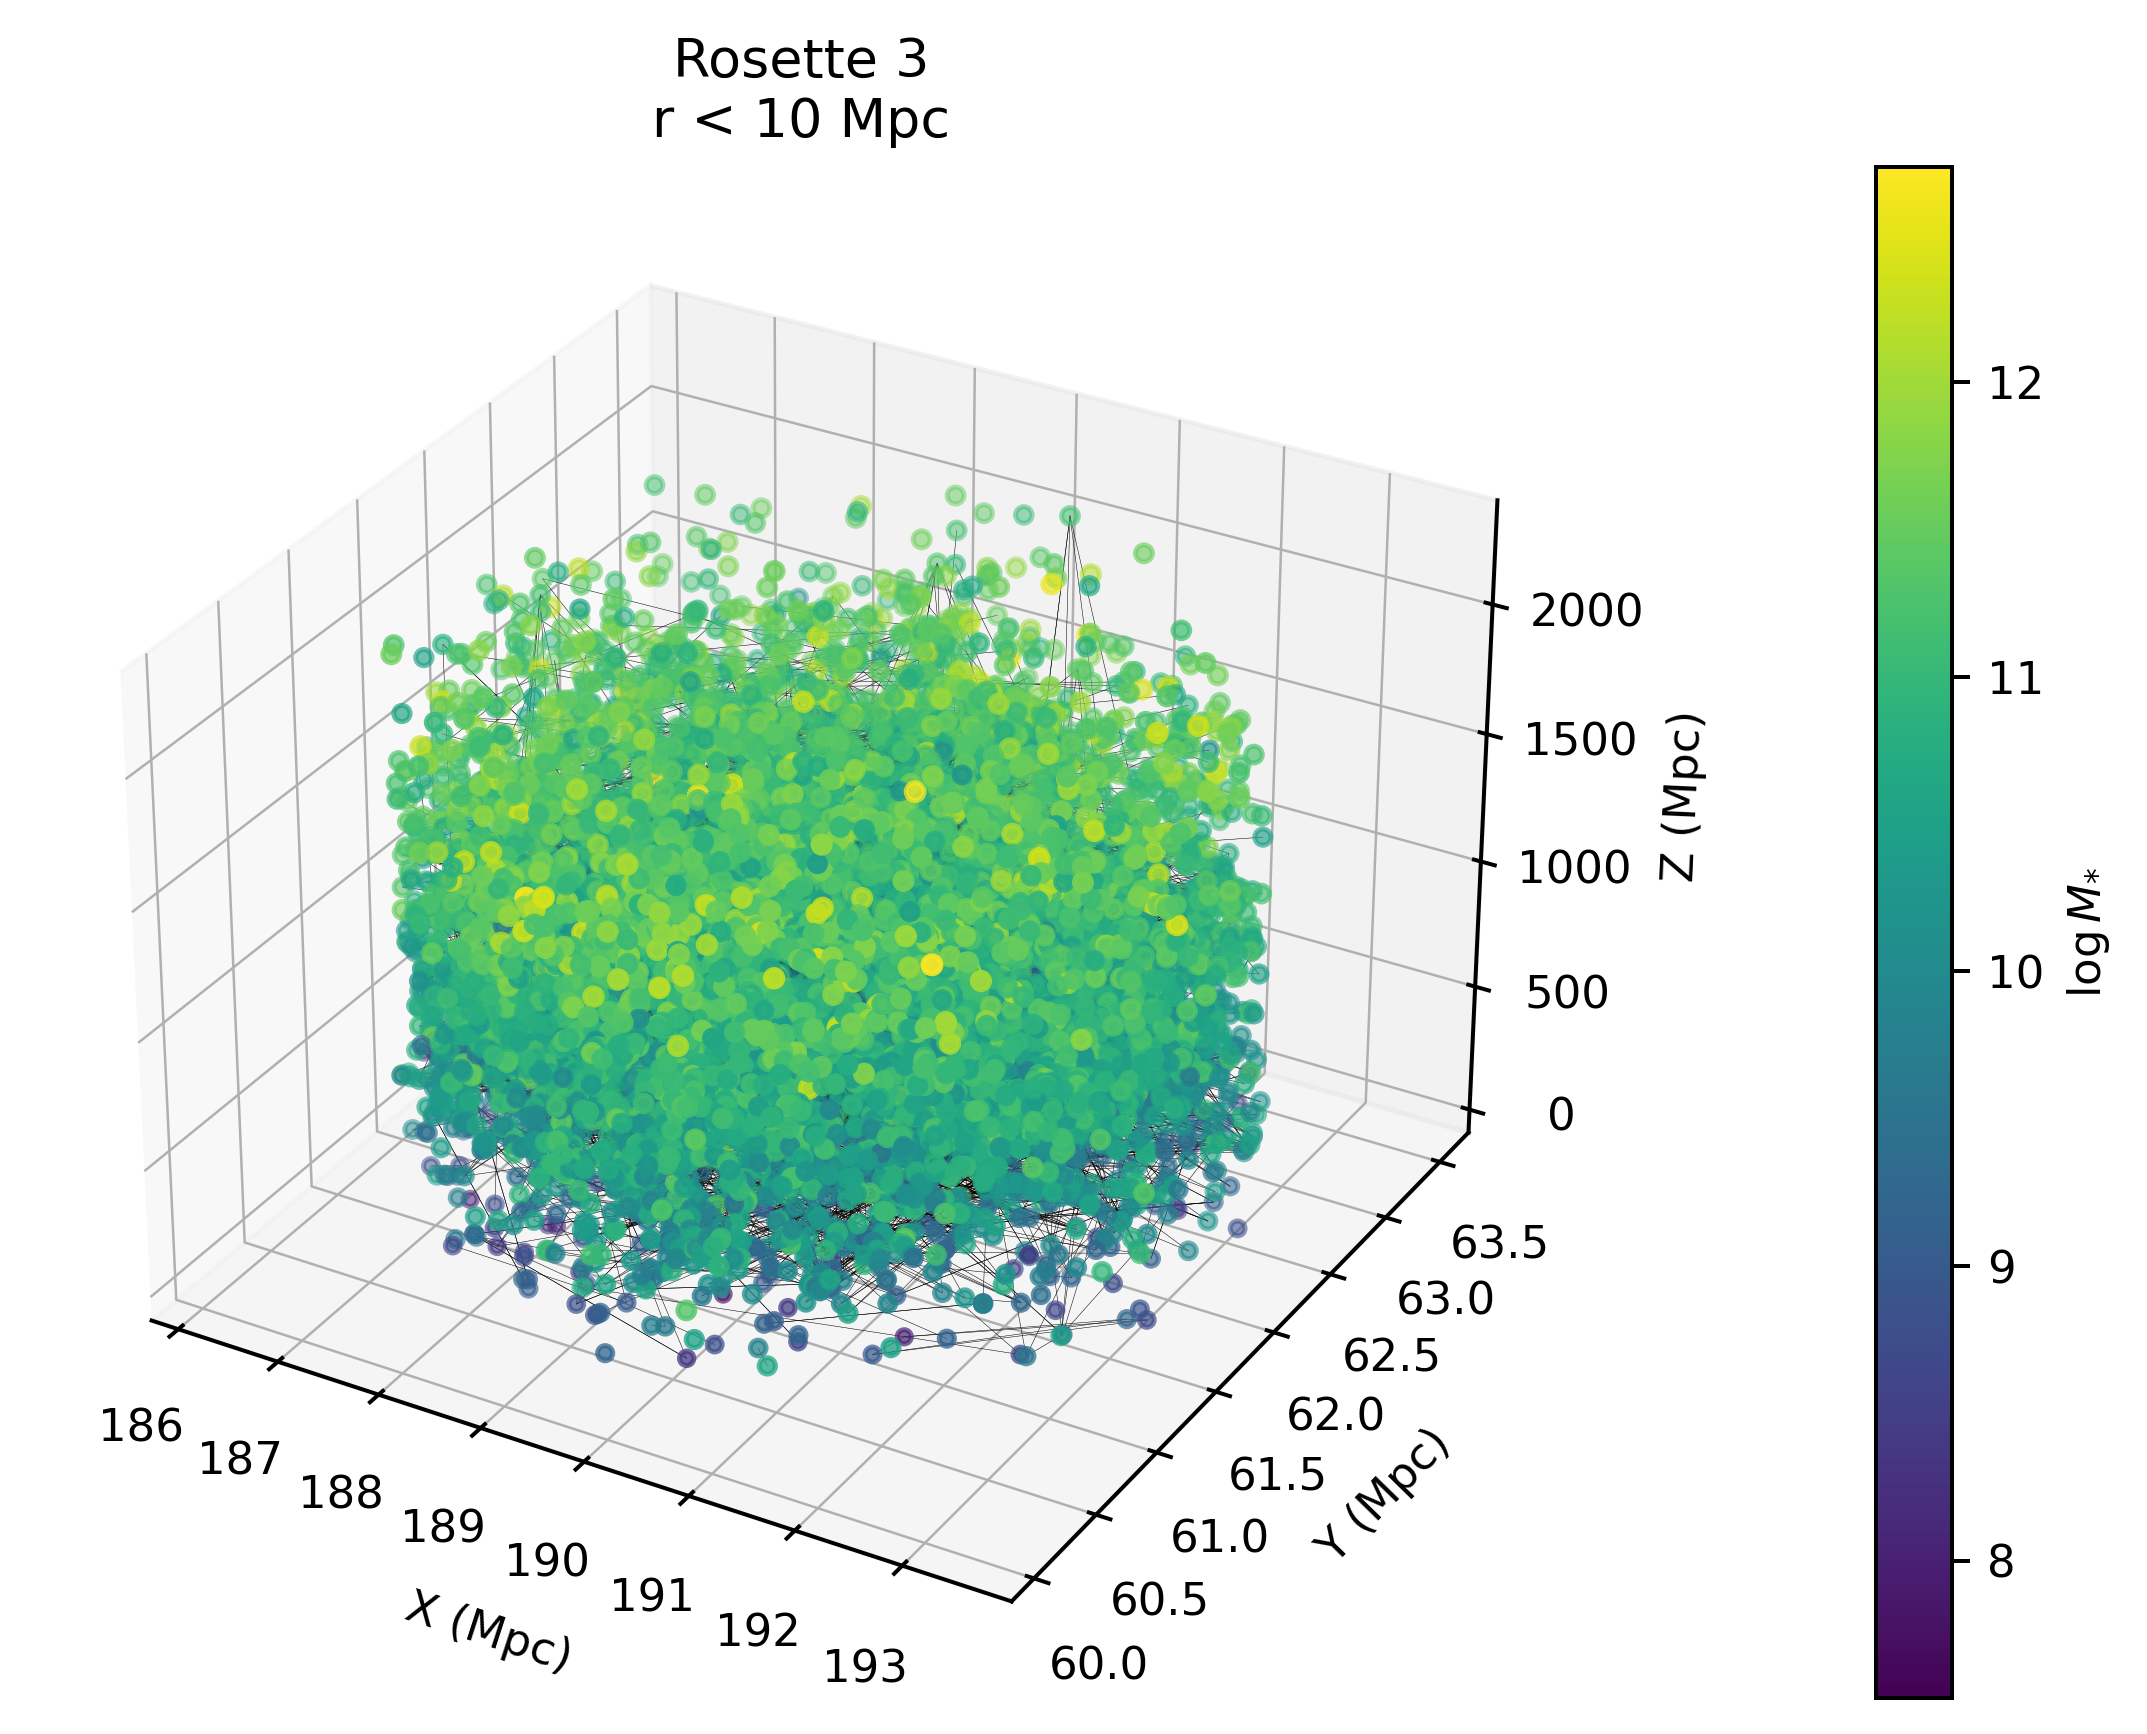

In [65]:
for r in rosettes[:1]:
    init = t.time()
    plot_graph(r)
    end = t.time()
    print(f'time plotting rosette_{r}: {round((end-init),2)} s')

In [74]:
def coord_pol(r):
    coord = []
    with open(f'../coord/rosette{r}.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = [float(n) for n in list(row.values())]
                c = []
                c.append(values[0])
                c.append(float(values[1]))
                c.append(float(values[2]))
                c.append(float(values[3]))

                coord.append(c)

    return coord

In [82]:
cd = coord_pol(rosettes[0])
l = []
for c in cd:
    sc = SkyCoord(ra=c[1]*u.deg, dec=c[2]*u.deg, distance=c[3]*u.Mpc)
    sc.representation_type = coord.CylindricalRepresentation
    scc = [sc.]
    l.append(sc)

In [95]:
l[1].to_string('decimal'), l[3]

('187.051 62.6145',
 <SkyCoord (ICRS): (rho, phi, z) in (Mpc, deg, Mpc)
     (574.34533964, -171.27016747, 1002.09468941)>)

TypeError: list indices must be integers or slices, not tuple

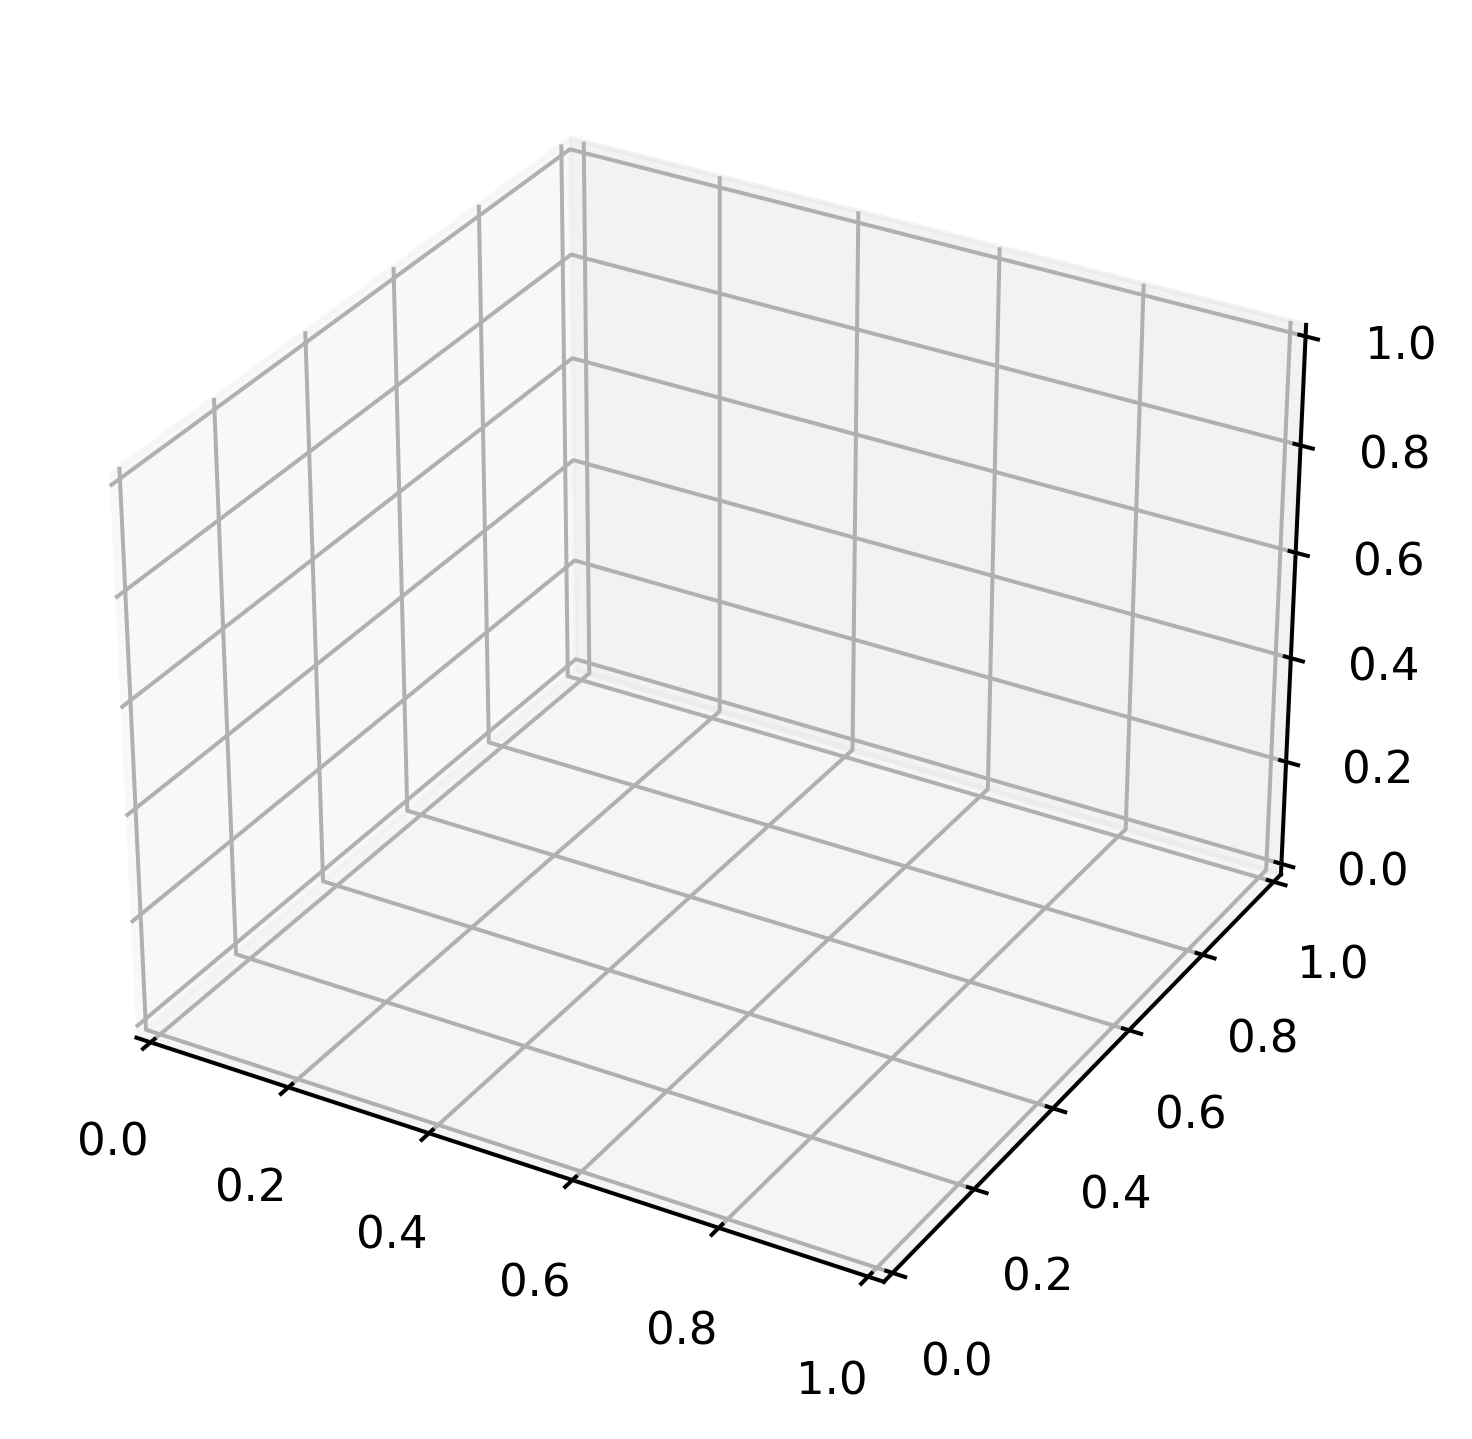

In [84]:
plt.rcParams['font.size'] = 9
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(l[:, 1], l[:, 2], l[:, 3])

In [78]:
def plot_graph(r):

    coord = np.array(coord_mod(r))
    nodes, edges, mass = graph_mod(r)
    nodes, edges = np.array(nodes), np.array(edges)

    plt.rcParams['font.size'] = 9
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    cmap = cm.viridis
    c_values = np.array(mass)
    norm = (c_values - np.min(c_values)) / (np.max(c_values) - np.min(c_values))
    min_norm = np.min(c_values)
    max_norm = np.max(c_values)
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
    sm.set_array([])

    ax.scatter(coord[:, 1], coord[:, 2], coord[:, 3], c=cmap(norm), s=mass)

    for edge in edges:
        indices = np.where(coord[:, 0] == edge[0])[0]
        x1, y1, z1 = coord[indices[0], 1:4]

        indices = np.where(coord[:, 0] == edge[1])[0]
        x2, y2, z2 = coord[indices[0], 1:4]

        ax.plot([x1, x2], [y1, y2], [z1, z2], color='black', linewidth=0.1)

    ax.set_xlabel('X (Mpc)')
    ax.set_ylabel('Y (Mpc)')
    ax.set_zlabel('Z (Mpc)')
    plt.title(f'Rosette {r}\nr < 10 Mpc')

    ax.xaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.yaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.zaxis._axinfo["grid"]['linewidth'] = 0.5

    cbar = plt.colorbar(sm, ax=ax, pad=0.14)
    cbar.set_label(r'$\log M_{*}$')

    plt.tight_layout()
    #plt.savefig(f'./rosette_img/rosette{r}.png')
    #plt.show()

astropy.coordinates.representation.CylindricalRepresentation